In [1]:
%run useful_functions.py

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


update 16


In [2]:
file_path = 'Financial_values/AAPL/daily_prices.csv'

price_table = pd.read_csv(file_path)

In [3]:
price_table['date'] = pd.to_datetime(price_table['date'])
price_table.set_index('date', inplace=True)
price_table.dropna(inplace=True)

price_table["prc"]/=price_table["cfacpr"]
price_table["openprc"]/=price_table["cfacpr"]
price_table["bidlo"]/=price_table["cfacpr"]
price_table["askhi"]/=price_table["cfacpr"]

In [4]:
price_table["bid ask factor"]= price_table[['prc']].rolling(window='31D').apply(bid_ask_estimator, args=(price_table,)).values

In [5]:
price_table

,prc,openprc,bidlo,askhi,cfacpr,bid ask factor
date,,,,,,
1992-06-15,0.469866,0.482143,0.468750,0.482143,112.0,NaN
1992-06-16,0.439732,0.462054,0.435268,0.464286,112.0,NaN
1992-06-17,0.424107,0.437500,0.419643,0.439732,112.0,NaN
1992-06-18,0.404018,0.424107,0.399554,0.437500,112.0,NaN
1992-06-19,0.399554,0.410714,0.390625,0.410714,112.0,NaN
...,...,...,...,...,...,...
2023-12-22,193.600010,195.179990,192.970000,195.410000,1.0,0.0
2023-12-26,193.050000,193.610000,192.830000,193.890000,1.0,0.0
2023-12-27,193.149990,192.490010,191.090000,193.500000,1.0,0.0


In [6]:
#complete the Nan
to_be_completed = price_table["bid ask factor"].copy().values
to_be_completed[to_be_completed < 0.000001] = np.nan
first_float_value_is_behind = False
first_float_value = np.nan

for i, val in enumerate(to_be_completed.copy()):
    if first_float_value_is_behind:
        if np.isnan(val):
            to_be_completed[i] = to_be_completed[i - 1]
    else:
        if not(np.isnan(val)):
            first_float_value_is_behind = True
            first_float_value = val

to_be_completed[np.isnan(to_be_completed)] = first_float_value

In [7]:
price_table["bid ask factor"]=to_be_completed

In [8]:
price_table

,prc,openprc,bidlo,askhi,cfacpr,bid ask factor
date,,,,,,
1992-06-15,0.469866,0.482143,0.468750,0.482143,112.0,0.001040
1992-06-16,0.439732,0.462054,0.435268,0.464286,112.0,0.001040
1992-06-17,0.424107,0.437500,0.419643,0.439732,112.0,0.001040
1992-06-18,0.404018,0.424107,0.399554,0.437500,112.0,0.001040
1992-06-19,0.399554,0.410714,0.390625,0.410714,112.0,0.001040
...,...,...,...,...,...,...
2023-12-22,193.600010,195.179990,192.970000,195.410000,1.0,0.002617
2023-12-26,193.050000,193.610000,192.830000,193.890000,1.0,0.002617
2023-12-27,193.149990,192.490010,191.090000,193.500000,1.0,0.002617


In [9]:
price_table["plus_cost"]=price_table['prc']*np.exp(price_table["bid ask factor"]*0.5)
price_table["minus_cost"]=price_table['prc']*np.exp(-price_table["bid ask factor"]*0.5)

In [10]:
price_table

,prc,openprc,bidlo,askhi,cfacpr,bid ask factor,plus_cost,minus_cost
date,,,,,,,,
1992-06-15,0.469866,0.482143,0.468750,0.482143,112.0,0.001040,0.470110,0.469622
1992-06-16,0.439732,0.462054,0.435268,0.464286,112.0,0.001040,0.439961,0.439504
1992-06-17,0.424107,0.437500,0.419643,0.439732,112.0,0.001040,0.424328,0.423887
1992-06-18,0.404018,0.424107,0.399554,0.437500,112.0,0.001040,0.404228,0.403808
1992-06-19,0.399554,0.410714,0.390625,0.410714,112.0,0.001040,0.399761,0.399346
...,...,...,...,...,...,...,...,...
2023-12-22,193.600010,195.179990,192.970000,195.410000,1.0,0.002617,193.853519,193.346832
2023-12-26,193.050000,193.610000,192.830000,193.890000,1.0,0.002617,193.302789,192.797542
2023-12-27,193.149990,192.490010,191.090000,193.500000,1.0,0.002617,193.402910,192.897401


In [11]:
prc_table= price_table.copy()

#prc_table=prc_table[prc_table.index > '2022-03-25']
#prc_table=prc_table[prc_table.index < '2022-05-25']

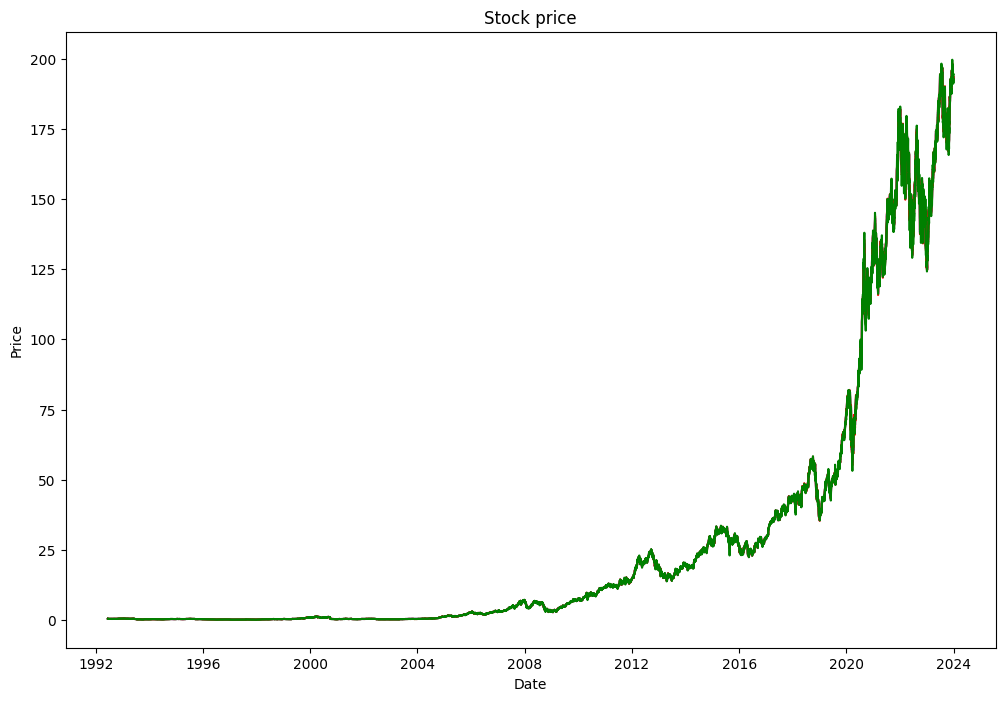

In [12]:
plt.plot(prc_table.index,prc_table["prc"],color="blue")
plt.plot(prc_table.index,prc_table["plus_cost"],color="red")
plt.plot(prc_table.index,prc_table["minus_cost"],color="red")
plt.plot(prc_table.index,prc_table["bidlo"],color="green")
plt.plot(prc_table.index,prc_table["askhi"],color="green")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock price")

# Show plot
plt.show()

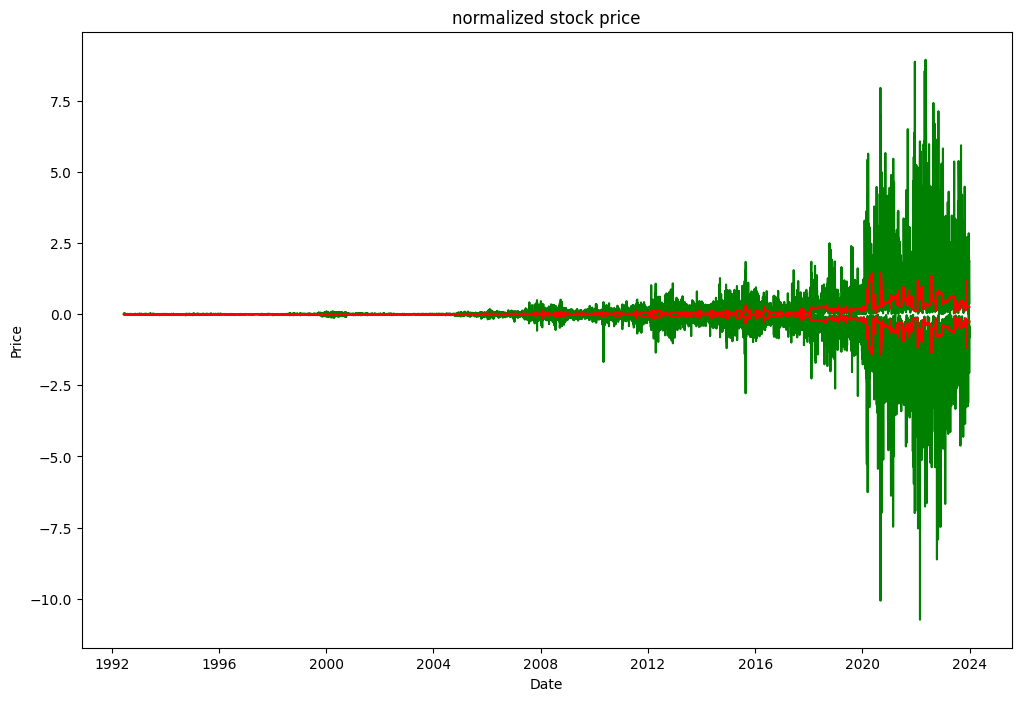

In [25]:
plt.plot(prc_table.index,prc_table["bidlo"]-prc_table["prc"],color="green")
plt.plot(prc_table.index,prc_table["askhi"]-prc_table["prc"],color="green")
plt.plot(prc_table.index,prc_table["plus_cost"]-prc_table["prc"],color="red")
plt.plot(prc_table.index,prc_table["minus_cost"]-prc_table["prc"],color="red")


# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("normalized stock price")

# Show plot
plt.show()

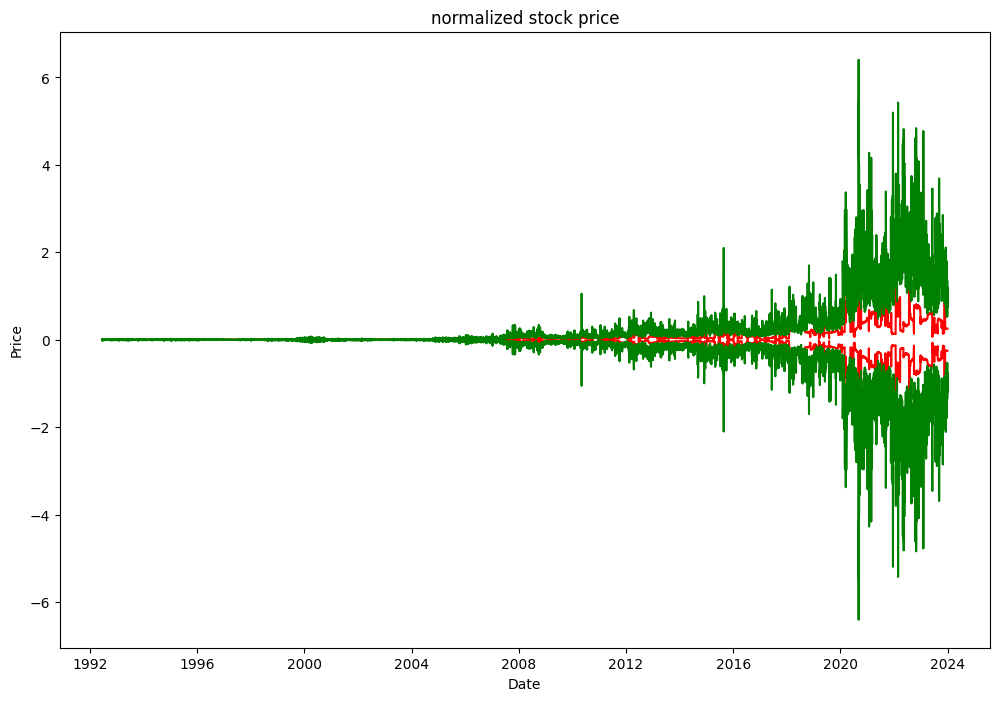

In [14]:
plt.plot(prc_table.index,prc_table["plus_cost"]-prc_table["prc"],color="red")
plt.plot(prc_table.index,prc_table["minus_cost"]-prc_table["prc"],color="red")
plt.plot(prc_table.index,(prc_table["bidlo"]-prc_table["askhi"])/2,color="green")
plt.plot(prc_table.index,(prc_table["askhi"]-prc_table["bidlo"])/2,color="green")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")
#plt.yscale("log")
plt.title("normalized stock price")

# Show plot
plt.show()

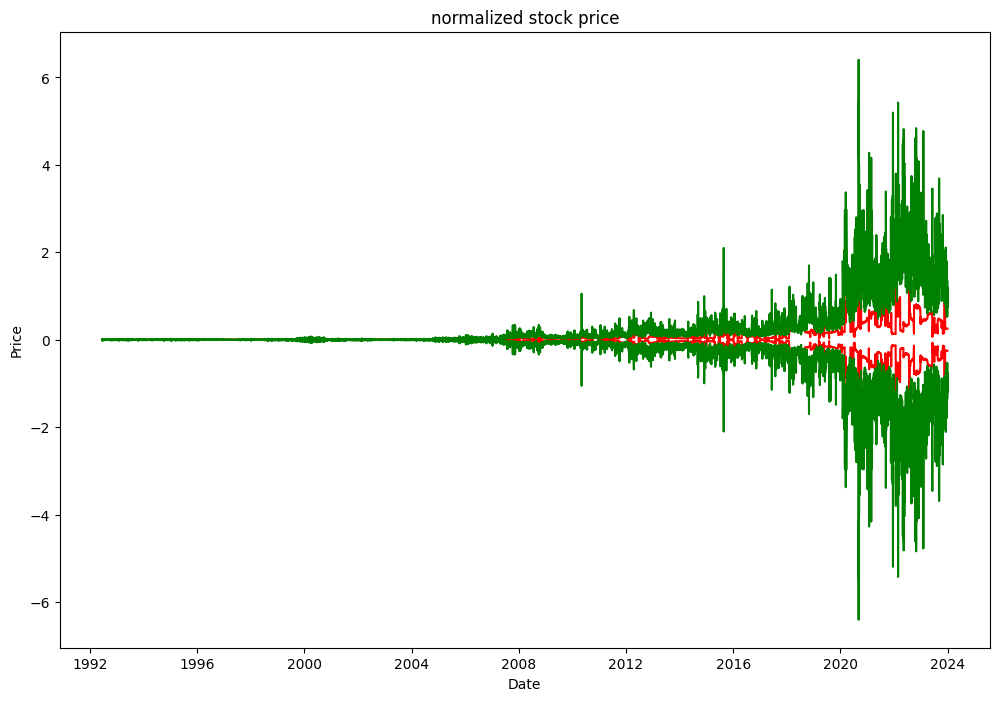

In [15]:
plt.plot(prc_table.index,(prc_table["plus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,(prc_table["minus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,((prc_table["bidlo"]-prc_table["askhi"])/2),color="green")
plt.plot(prc_table.index,((prc_table["askhi"]-prc_table["bidlo"])/2),color="green")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")

plt.title("normalized stock price")

# Show plot
plt.show()

In [16]:
def smoothing(arr, window_size=30):
   
    # Define the smoothing kernel
    kernel = np.ones(window_size) / window_size
    
    # Perform convolution
    smoothed = np.convolve(arr, kernel, mode='same')
    
    return smoothed 

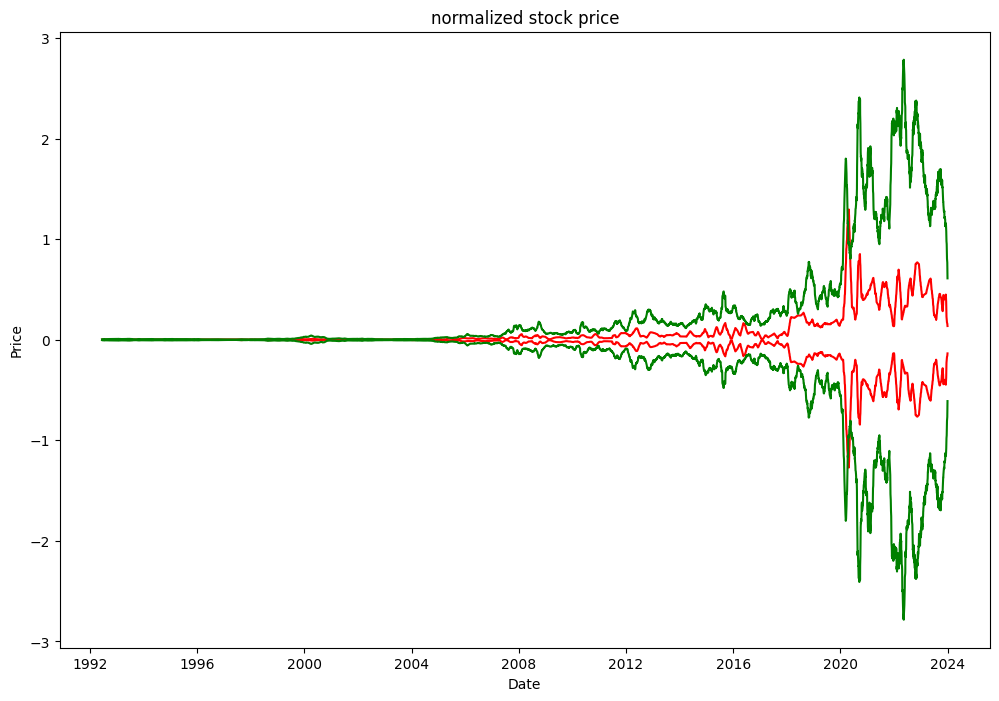

In [17]:
plt.plot(prc_table.index,smoothing(prc_table["plus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,smoothing(prc_table["minus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,smoothing((prc_table["bidlo"]-prc_table["askhi"])/2),color="green")
plt.plot(prc_table.index,smoothing((prc_table["askhi"]-prc_table["bidlo"])/2),color="green")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")
#plt.yscale("log")
plt.title("normalized stock price")

# Show plot
plt.show()

In [18]:
from scipy.ndimage import percentile_filter

def replace_top_5_percentile(arr, window_size=30):
   
    # Calculate the number of elements corresponding to top 5% within the window
    num_top_values = int(window_size * 0.05)

    # Use percentile_filter to get the 95th percentile within each window
    percentile_values = percentile_filter(arr, 95, size=window_size)

    # Find the indices of top 5% highest values within each window
    top_indices = np.argpartition(arr, -num_top_values, axis=0)[-num_top_values:]

    # Replace the top 5% highest values with the 95th percentile values
    arr[top_indices] = percentile_values[top_indices]

    return arr

C:\Users\natha\AppData\Local\Temp\ipykernel_11892\1700841051.py:15: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  arr[top_indices] = percentile_values[top_indices]


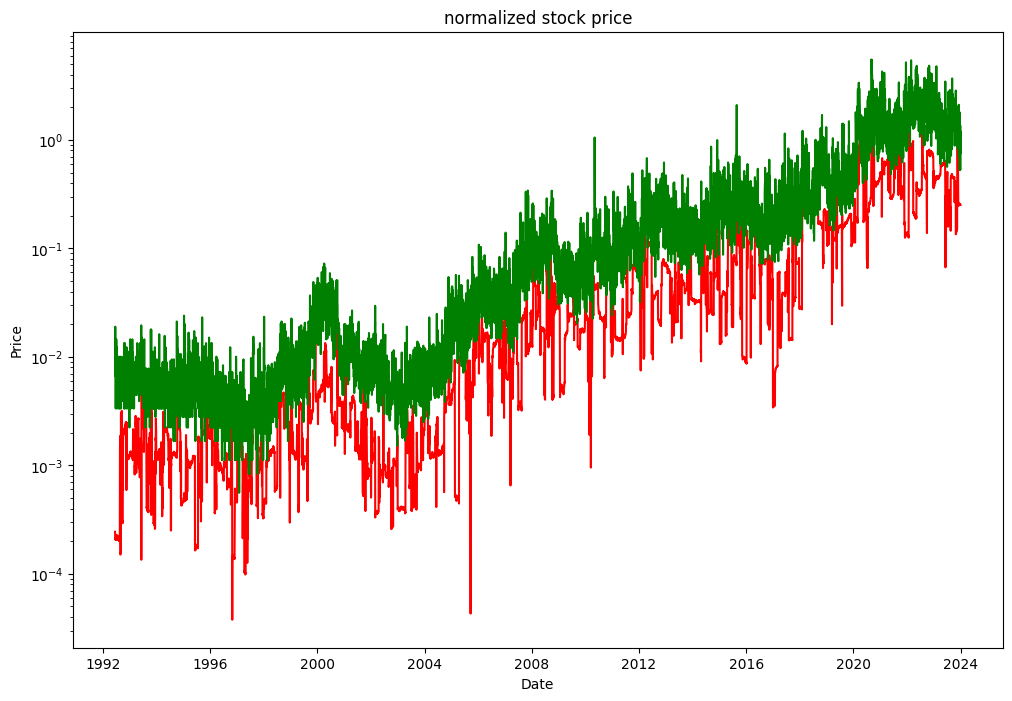

In [19]:
plt.plot(prc_table.index,replace_top_5_percentile(prc_table["plus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,replace_top_5_percentile(prc_table["minus_cost"]-prc_table["prc"]),color="red")
plt.plot(prc_table.index,replace_top_5_percentile((prc_table["bidlo"]-prc_table["askhi"])/2),color="green")
plt.plot(prc_table.index,replace_top_5_percentile((prc_table["askhi"]-prc_table["bidlo"])/2),color="green")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.yscale("log")
plt.title("normalized stock price")

# Show plot
plt.show()

In [20]:
print(np.mean(price_table["prc"]-price_table["bidlo"]))

0.30561515481290163


In [21]:
print(np.mean(price_table["prc"]-price_table["minus_cost"]))

0.08698204850283871


In [22]:
print(np.mean(price_table["askhi"]-price_table["prc"]))

0.28024002321856045


In [23]:
print(np.mean(price_table["plus_cost"]-price_table["prc"]))

0.08742079027302559


In [24]:
price_table

,prc,openprc,bidlo,askhi,cfacpr,bid ask factor,plus_cost,minus_cost
date,,,,,,,,
1992-06-15,0.469866,0.482143,0.468750,0.482143,112.0,0.001040,0.470110,0.469622
1992-06-16,0.439732,0.462054,0.435268,0.464286,112.0,0.001040,0.439961,0.439504
1992-06-17,0.424107,0.437500,0.419643,0.439732,112.0,0.001040,0.424328,0.423887
1992-06-18,0.404018,0.424107,0.399554,0.437500,112.0,0.001040,0.404228,0.403808
1992-06-19,0.399554,0.410714,0.390625,0.410714,112.0,0.001040,0.399761,0.399346
...,...,...,...,...,...,...,...,...
2023-12-22,193.600010,195.179990,192.970000,195.410000,1.0,0.002617,193.853519,193.346832
2023-12-26,193.050000,193.610000,192.830000,193.890000,1.0,0.002617,193.302789,192.797542
2023-12-27,193.149990,192.490010,191.090000,193.500000,1.0,0.002617,193.402910,192.897401
